In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#pip install pandas-profiling
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#from pandas_profiling import ProfileReport

# Visualizando o crescimento dos casos de suicídio (por gênero e idade)

In [3]:
df = pd.read_csv('who_suicide_statistics.csv')  # lê o arquivo csv
df                                              # exibe o dataframe

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [4]:
df.describe()  # Mostra informações estatísticas sobre o dataframe

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [5]:
df1 = df.dropna()                                   # exclui linhas com termos nulos
df1 = df1.drop(df1[df1.country != 'Brazil'].index)  # exclui as linhas cujo país não seja Brazil
df1.describe()

,year,suicides_no,population
count,444.000000,444.000000,4.440000e+02
mean,1997.000000,564.918919,1.240234e+07
std,10.689122,616.996250,6.564101e+06
min,1979.000000,19.000000,6.556210e+05
25%,1988.000000,88.750000,7.446056e+06
50%,1997.000000,344.500000,1.400505e+07
75%,2006.000000,822.250000,1.718881e+07
max,2015.000000,3238.000000,2.846186e+07


In [6]:
correlation = df1.corr()       # exibe a correlação entre as variáveis numéricas
correlation

,year,suicides_no,population
year,1.000000,0.301916,0.345433
suicides_no,0.301916,1.000000,0.428713
population,0.345433,0.428713,1.000000


In [7]:
# Separando em dois dataframes por gênero
dfmale = df1.drop(df1[df1.sex != 'male'].index)      # exclui as linhas cujo gênero não seja male
dffemale = df1.drop(df1[df1.sex != 'female'].index)  # exclui as linhas cujo gênero não seja female

#### Agrupando linhas por data, removendo as colunas desnecessárias e redefinindo a data de índice para coluna de variável

In [8]:
#  manipulando o dataframe dos homens para plotagem 

groupedm = dfmale[['country', 'sex', 'year','age', 'suicides_no', 'population']].groupby(dfmale['year'])
dfmale = groupedm.sum()                            # em conjunto com a linha acima, agrupa as linhas com termos iguais na coluna year somando-as
dfmale.columns = ['year', 'homens', 'population']  # renomeia a coluna suicides_no para homens

In [9]:
# com os comandos acima temos uma coluna indice year onde os anos não repetem e não foram somados e, alem dela, 
# uma coluna years onde os anos foram somados

dfmale2 = dfmale.drop(['year'], axis=1)  # exclui a coluna year que recebeu soma
dfmale2 = dfmale2.reset_index()          # transforma em coluna de variaveis a coluna years que era indice
#dfmale2.tail()                          # exibe as 5 últimas linhas do dataframe

In [10]:
#  abaixo repetimos o passo acima, agora para o dataframe das mulheres

groupedf = dffemale[['country', 'sex', 'year','age', 'suicides_no', 'population']].groupby(dffemale['year'])
dffemale = groupedf.sum()
dffemale.columns = ['year', 'mulheres', 'population']

In [11]:
dffemale2 = dffemale.drop(['year'], axis=1)
dffemale2 = dffemale2.reset_index()
#dffemale2.tail()

#### Plotando um gráfico de barras comparativo por gênero e data

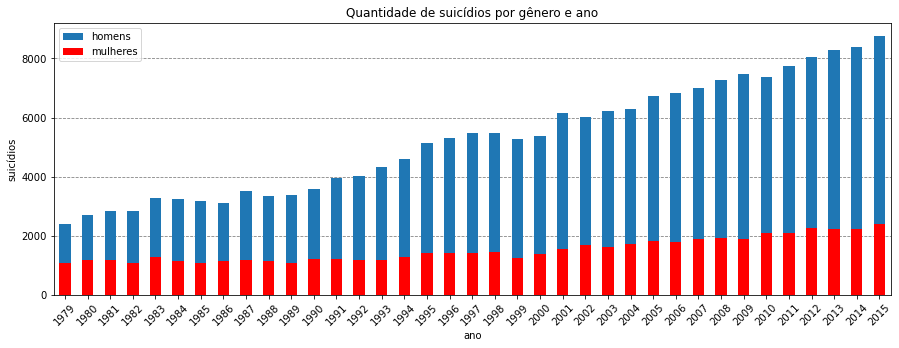

In [12]:
plt.figure(figsize=(15,5))                                             # define o tamanho do gráfico
ax = plt.gca()                                                         # especificando os eixos que serão plotados
plt.title('Quantidade de suicídios por gênero e ano')                  # título do gráfico

dfmale2.plot(kind='bar',x= 'year', y='homens', ax=ax)                  # plotagem das barras referentes aos homens

dffemale2.plot(kind='bar',x= 'year',y='mulheres', color='red', ax=ax)  # plotagem das barras referentes às mulheres

plt.ylabel('suicídios')                                                # legenda do eiro y (vertical)
plt.xlabel('ano')                                                      # legenda do eixo x (horizontal)
plt.xticks(rotation=45)                                                # projeta os anos em 45º
ax.set_axisbelow(True)                                                 # em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico
ax.yaxis.grid(color='gray', linestyle='dashed')

Fica evidente que a maior parte das vítimas de suicídio são do gênero masculino e essa discrepância só cresce.

## Codificando agora para o plot comparativo de suicídio entre as idades

In [23]:
# Separando o dataframe por 6 dataframes, cada um referente a uma idade

df5 = df1.drop(df1[df1.age != '5-14 years'].index)    # exclui as linhas cuja idade não seja 5-14 anos
df15 = df1.drop(df1[df1.age != '15-24 years'].index)  # exclui as linhas cuja idade não seja 15-24 anos
df25 = df1.drop(df1[df1.age != '25-34 years'].index)  # exclui as linhas cuja idade não seja 25-34 anos
df35 = df1.drop(df1[df1.age != '35-54 years'].index)  # exclui as linhas cuja idade não seja 35-54 anos
df55 = df1.drop(df1[df1.age != '55-74 years'].index)  # exclui as linhas cuja idade não seja 55-74 anos
df75 = df1.drop(df1[df1.age != '75+ years'].index)    # exclui as linhas cuja idade não seja 75+ anos

In [24]:
# Quebrando a distinção de gêneros agrupando-os por year em comum

def grp(dff):
    groupedm = dff[['country', 'sex', 'year','age', 'suicides_no', 'population']].groupby(dff['year'])  #agrupa as linhas com year em comum
    dff = groupedm.sum()
    return dff

df5 = grp(df5)                                                                                          # aplica a função criada para agrupar por years
df5.columns = ['year', '5-14 anos', 'population']                                                       # renomeia as colunas

df15 = grp(df15)
df15.columns = ['year', '15-24 anos', 'population']  

df25 = grp(df25)
df25.columns = ['year', '25-34 anos', 'population']  

df35 = grp(df35)
df35.columns = ['year', '35-54 anos', 'population']  

df55 = grp(df55)
df55.columns = ['year', '55-74 anos', 'population']  

df75 = grp(df75)
df75.columns = ['year', '75+ anos', 'population'] 

In [25]:
# Resetando o year index das colunas como uma coluna variavel manipulavel e excluindo a coluna variavel year incompativel

def drpy(dy):                        # dentro do parentese segue a variavel que vou aplicar os comandos abaixo
    dy = dy.drop(['year'], axis=1)   # aplica comando de dropar a coluna anos
    dy = dy.reset_index()            # aplica comando de resetar indices
    return dy                        # pede para retornar o valor da variavel após aplicar a função
    
df5 = drpy(df5)                      # aplica a função conigurada acima na variavel df5
df15 = drpy(df15)
df25 = drpy(df25)
df35 = drpy(df35)
df55 = drpy(df55)
df75 = drpy(df75)

In [17]:
#df75.head()  # conferindo um dos 6 dataframes modificados

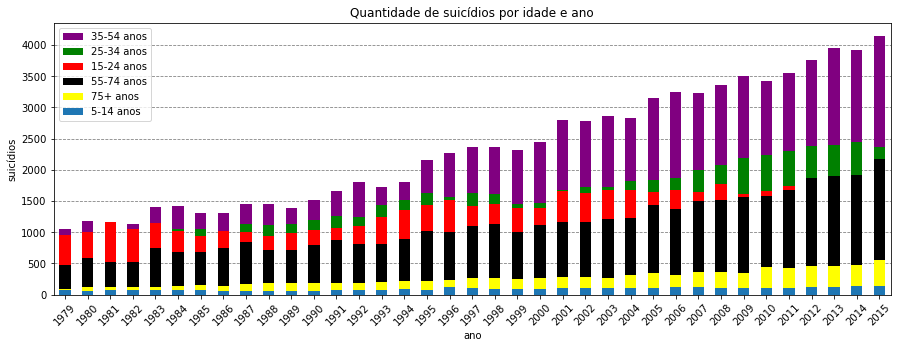

In [26]:
plt.figure(figsize=(15,5))                                              # define o tamanho do gráfico
ax = plt.gca()                                                          # especifica os eixos que serão plotados
plt.title('Quantidade de suicídios por idade e ano')                    # título do gráfico   
    
df35.plot(kind='bar',x= 'year',y='35-54 anos', color='purple', ax=ax)   # plotagem das barras referentes às idades 35-54

df25.plot(kind='bar',x= 'year',y='25-34 anos', color='green', ax=ax)    # plotagem das barras referentes às idades 25-34

df15.plot(kind='bar',x= 'year',y='15-24 anos', color='red', ax=ax)      # plotagem das barras referentes às idades 15-24
 
df55.plot(kind='bar',x= 'year',y='55-74 anos', color='black', ax=ax)    # plotagem das barras referentes às idades 55-74

df75.plot(kind='bar',x= 'year',y='75+ anos', color='yellow', ax=ax)     # plotagem das barras referentes às idades 75+

df5.plot(kind='bar',x= 'year', y='5-14 anos', ax=ax)                    # plotagem das barras referentes às idades 5-14

# foi importante aqui definir a ordem correta das plotagens, pois as barras sobressaem sobre as demais

plt.ylabel('suicídios')                            # legenda do eixo y (vertical)
plt.xlabel('ano')                                  # legenda do eixo x (horizontal)
plt.xticks(rotation=45)                            # projeta os anos em 45º
#plt.grid()                                        # projeta uma grade quadriculada sobre o grafico
ax.set_axisbelow(True)                             # em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico
ax.yaxis.grid(color='gray', linestyle='dashed')

Aqui é importante informar que as barras indicam quantidade, não proporção. Devemos distribuir os suicídios por porporção de população de cada classe para realmente fazer uma relação entre as classes.

In [28]:
df5['5-14 anos'] = (df5['5-14 anos']/df5['population'])*100000
df15['15-24 anos'] = (df15['15-24 anos']/df15['population'])*100000
df25['25-34 anos'] = (df25['25-34 anos']/df25['population'])*100000
df35['35-54 anos'] = (df35['35-54 anos']/df35['population'])*100000
df55['55-74 anos'] = (df55['55-74 anos']/df55['population'])*100000
df75['75+ anos'] = (df75['75+ anos']/df75['population'])*100000

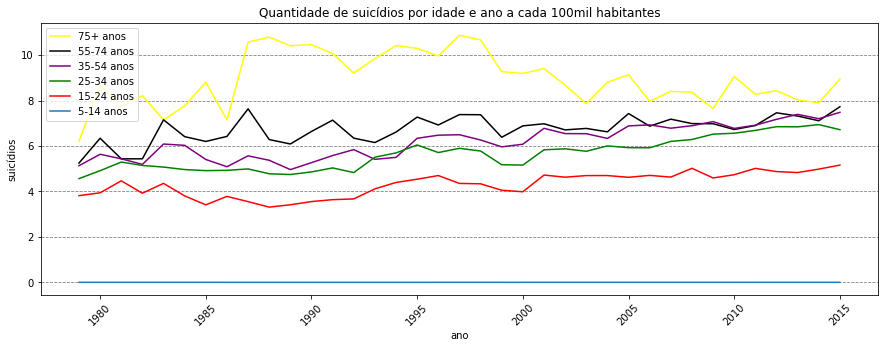

In [38]:
plt.figure(figsize=(15,5))                                              # define o tamanho do gráfico
ax = plt.gca()                                                          # especifica os eixos que serão plotados
plt.title('Quantidade de suicídios por idade e ano a cada 100mil habitantes')                    # título do gráfico   


df75.plot(kind='line',x= 'year',y='75+ anos', color='yellow', ax=ax)     # plotagem das barras referentes às idades 75+

df55.plot(kind='line',x= 'year',y='55-74 anos', color='black', ax=ax)    # plotagem das barras referentes às idades 55-74

df35.plot(kind='line',x= 'year',y='35-54 anos', color='purple', ax=ax)   # plotagem das barras referentes às idades 35-54

df25.plot(kind='line',x= 'year',y='25-34 anos', color='green', ax=ax)    # plotagem das barras referentes às idades 25-34

df15.plot(kind='line',x= 'year',y='15-24 anos', color='red', ax=ax)      # plotagem das barras referentes às idades 15-24

df5.plot(kind='line',x= 'year', y='5-14 anos', ax=ax)                    # plotagem das barras referentes às idades 5-14


# foi importante aqui definir a ordem correta das plotagens, pois as barras sobressaem sobre as demais

plt.ylabel('suicídios')                            # legenda do eixo y (vertical)
plt.xlabel('ano')                                  # legenda do eixo x (horizontal)
plt.xticks(rotation=45)                            # projeta os anos em 45º
#plt.grid()                                        # projeta uma grade quadriculada sobre o grafico
ax.set_axisbelow(True)                             # em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico
ax.yaxis.grid(color='gray', linestyle='dashed')

Conclusão até aqui: Agora sim podemos fazer uma comparação justa. Aqui podemos ver que, em 2015 com relação aos anos 90, a taxa de suicidios dos idosos caiu por volta de 10%, enquanto que em todos os outros grupos a mesma subiu. A taxa de suicidios entre crianças de 5-14 anos é baixa, provavelmente por não haver uma pressão da sociedade para que essa criança um dia seja bem sucedida, fato este que se agrava com o aumento da idade, podendo ser a causa da maior parte dos suicidios estar concentrada na população mais velha, decrescendo em proporção com a idade.